In [2]:
import numpy as np
import pandas as pd
import os

In [48]:
def save_dataframe(path, dataframe):
    np.save(path + ".data", dataframe.values)
    np.save(path + ".header", dataframe.columns)
    
def load_dataframe(path):
    data = np.load(path + ".data.npy")
    header = np.load(path + ".header.npy")
    return pd.DataFrame(data=data, columns=header)

def save_dataframe32(path, dataframe, keep=[]):
    col64 = [col_ for col_ in dataframe.columns if col_ in keep]
    col32 = [col_ for col_ in dataframe.columns if col_ not in keep]
    dataframe64 = dataframe[col64]
    dataframe32 = dataframe[col32]
    np.save(path + ".data64", dataframe64.values)
    np.save(path + ".header64", col64)
    np.save(path + ".data32", dataframe32.values.astype(np.float32))
    np.save(path + ".header32", col32)

def load_dataframe32(path):
    path_data32 = path + ".data32.npy"
    path_header32 = path + ".header32.npy"
    path_data64 = path + ".data64.npy"
    path_header64 = path + ".header64.npy"
    result = pd.DataFrame()
    if os.path.exists(path_data32):
        data32 = np.load(path_data32)
        header32 = np.load(path_header32)
        df32 = pd.DataFrame(data=data32, columns=header32)
        result = pd.concat([result, df32], axis=1)
    if os.path.exists(path_data64):
        data64 = np.load(path_data64)
        header64 = np.load(path_header64)
        df64 = pd.DataFrame(data=data64, columns=header64)
        result = pd.concat([result, df64], axis=1)
    return result

In [49]:
os.listdir("./bindata/")

['data_009.data32.npy',
 'data_009.data64.npy',
 'data_009.header32.npy',
 'data_009.header64.npy',
 'test_009.data32.npy',
 'test_009.data64.npy',
 'test_009.header32.npy',
 'test_009.header64.npy',
 'y_009.data32.npy',
 'y_009.data64.npy',
 'y_009.header32.npy',
 'y_009.header64.npy']

In [52]:
test = load_dataframe32('./bindata/test_009')
test["SK_ID_CURR"] = test.SK_ID_CURR.astype("int")

## stacking

In [3]:
os.listdir("./result/")

['submission-000-less.csv',
 'submission-000-more.csv',
 'submission-000.csv',
 'submission-001-A.csv',
 'submission-001-B.csv',
 'submission-001-C.csv',
 'submission-003-B.csv',
 'submission-003-C.csv',
 'submission-003-D.csv',
 'submission-005-D.csv',
 'submission-010-sub0.npy',
 'submission-010-sub1.npy',
 'submission-010-sub2.npy',
 'submission-010-sub3.npy',
 'submission-011-A.csv',
 'submission-011-B.csv',
 'tidy_xgb_0.7784.csv',
 'X_bld-010.npy',
 'X_pred_bld-010.npy',
 'X_pred_val-010.npy']

In [8]:
sub0 = np.load("./result/submission-010-sub0.npy")
sub1 = np.load("./result/submission-010-sub1.npy")
sub2 = np.load("./result/submission-010-sub2.npy")
sub3 = np.load("./result/submission-010-sub3.npy")

In [9]:
sub_mean = (sub0 + sub1 + sub2 + sub3) / 4

In [42]:
sub_rank = np.zeros(len(sub0))

for sub in [sub0, sub1, sub2, sub3]:
    sub_rank += pd.Series(sub).rank().values
    
sub_rank = sub_rank / 4/ len(sub_rank)

In [55]:
test["TARGET"] = sub_mean
test[["SK_ID_CURR", "TARGET"]].to_csv("./result/submission-012-A.csv", index=False)

test["TARGET"] = sub_rank
test[["SK_ID_CURR", "TARGET"]].to_csv("./result/submission-012-B.csv", index=False)

## some plot

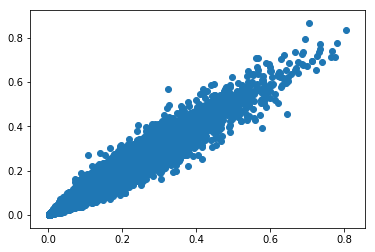

In [46]:
plt.scatter(sub_mean, sub2)
plt.show()

In [28]:
1/ (1 + np.exp(-sub_rank / 4 / len(sub_rank)))

array([ 0.60306968,  0.70561886,  0.52809563, ...,  0.50744267,
        0.600496  ,  0.71786991])

In [31]:
import matplotlib.pyplot as plt

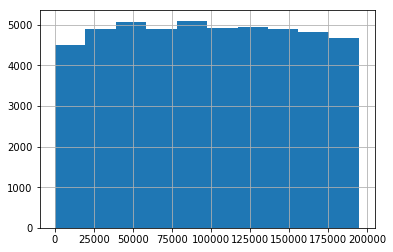

In [34]:
pd.Series(sub_rank).hist()
plt.show()

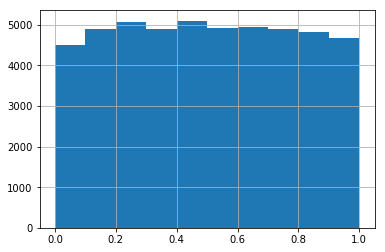

In [40]:
pd.Series(sub_rank / 4/ len(sub_rank)).hist()
plt.show()

In [41]:
sub_rank / 4/ len(sub_rank)

array([ 0.41827199,  0.8741999 ,  0.11250103, ...,  0.0297729 ,
        0.40753221,  0.93392007])

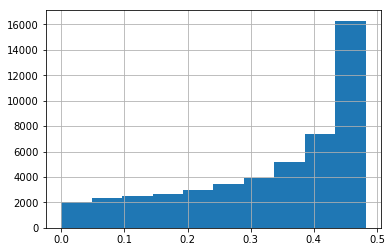

In [38]:
pd.Series(1/ (1 + np.exp(-sub_rank / len(sub_rank))) - 0.5).hist()
plt.show()

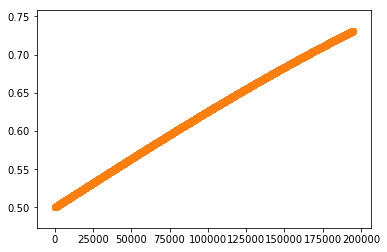

In [36]:
plt.scatter(sub_rank, 1/ (1 + np.exp(-sub_rank / 4 / len(sub_rank))))
plt.show()